In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

data=fetch_openml("mnist_784",version=1)
data.keys()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
x=data["data"]
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
y=data["target"]
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [5]:
y=y.astype(np.uint8)

In [6]:
x.shape

(70000, 784)

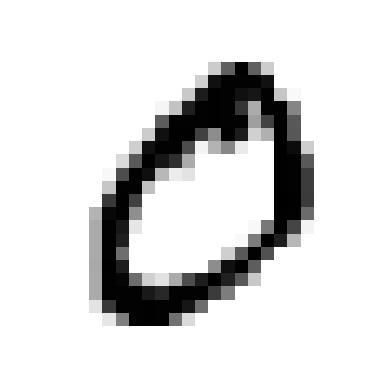

In [7]:
import matplotlib as mlt

digit=x.iloc[1,:]
digit=np.array(digit)
digit_img=digit.reshape(28,28)

plt.imshow(digit_img, cmap=mlt.cm.binary, interpolation="nearest")
plt.axis(False)
plt.show()

In [8]:
y[1]

0

In [9]:
x_train,x_test,y_train,y_test=x[0:60000],x[60000:],y[0:60000],y[60000:]

In [10]:
y_test.shape

(10000,)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

kngh_class=KNeighborsClassifier()
kngh_class.fit(x_train,y_train)

KNeighborsClassifier()

In [12]:
kngh_class.predict([digit])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [14]:
cross_val_score(kngh_class, x_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [15]:
y_predicted=kngh_class.predict(x_test)
print(y_predicted)

[7 2 1 ... 4 5 6]


In [16]:
print(y_test)

60000    7
60001    2
60002    1
60003    0
60004    4
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 10000, dtype: uint8


In [17]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predicted)

array([[ 974,    1,    1,    0,    0,    1,    2,    1,    0,    0],
       [   0, 1133,    2,    0,    0,    0,    0,    0,    0,    0],
       [  11,    8,  991,    2,    1,    0,    1,   15,    3,    0],
       [   0,    3,    3,  976,    1,   13,    1,    6,    3,    4],
       [   3,    7,    0,    0,  944,    0,    4,    2,    1,   21],
       [   5,    0,    0,   12,    2,  862,    4,    1,    2,    4],
       [   5,    3,    0,    0,    3,    2,  945,    0,    0,    0],
       [   0,   22,    4,    0,    3,    0,    0,  988,    0,   11],
       [   8,    3,    5,   13,    6,   12,    5,    5,  913,    4],
       [   5,    7,    3,    9,    7,    3,    1,   10,    2,  962]])

In [18]:
print("Precision score: ",precision_score(y_test,y_predicted, average="weighted"))
print("Recall score: ",recall_score(y_test,y_predicted,average="weighted"))
print("F1 score: ",f1_score(y_test,y_predicted,average="weighted"))

Precision score:  0.9690205934964162
Recall score:  0.9688
F1 score:  0.9687470572168784


In [19]:
from sklearn.metrics import precision_score

precision_per_class = precision_score(y_test, y_predicted, average=None)

# Micro-average
precision_micro = precision_score(y_test, y_predicted, average='micro')

# Macro-average
precision_macro = precision_score(y_test, y_predicted, average='macro')

# Weighted-average
precision_weighted = precision_score(y_test, y_predicted, average='weighted')

print(precision_per_class)
print(precision_micro)
print(precision_macro)
print(precision_weighted)

[0.96340257 0.95450716 0.98216056 0.96442688 0.9762151  0.96528555
 0.98130841 0.96108949 0.98809524 0.95626243]
0.9688
0.9692753386570571
0.9690205934964162


from sklearn.model_selection import GridSearchCV

param_grid={
    "n_neighbors":[3,5,7],
    "weights":["uniform","distance"],
    "p":[1,2]
}

grid_search=GridSearchCV(kngh_class,param_grid,cv=5,scoring="accuracy")

grid_search.fit(x_train,y_train)

y_predicted_2=grid_search.predict(y_test)
print(accuracy_score(y_test,y_predicted_2))

In [21]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_predicted))

0.9688


In [22]:
import xgboost as xgb

# dtrain=xgb.DMatrix(x_train, label=y_train)
# dtest= xgb.DMatrix(x_test,label=y_test)

xgb_class=xgb.XGBClassifier(obejective="binary:logistic",
                            max_depth=3,
                            learning_rate=0.1,
                            n_estimators=100)
xgb_class.fit(x_train,y_train)

y_predicted_2=xgb_class.predict(x_test)
print(accuracy_score(y_test,y_predicted_2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:02:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "obejective" } are not used.

  warnings.warn(smsg, UserWarning)


0.9368


In [23]:
from sklearn.ensemble import VotingClassifier

vtg_class=VotingClassifier(estimators=[
    ('kngh',kngh_class),
    ('xgb',xgb_class)
],voting="soft")

vtg_class.fit(x_train, y_train)
y_predicted_3=vtg_class.predict(x_test)

print(accuracy_score(y_test, y_predicted_3))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:17:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "obejective" } are not used.

  warnings.warn(smsg, UserWarning)


0.9694
